In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import datetime
import pylab as pl
pl.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sma
import numpy as np
import scipy
import statsmodels

In [9]:
def convertDate(d):
    #dt = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    #dt = dt.replace(minute=(dt.minute / 20) * 10, second=0, microsecond=0)
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    dt = dt.replace(day=1, month=1)
    #dt = dt - datetime.timedelta(hours=5)
    return dt

crashes = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})#, parse_dates=[1])

In [10]:
crashes['PERCENT OF PERSONS KILLED'] = crashes['NUMBER OF PERSONS KILLED']/(crashes['NUMBER OF PERSONS KILLED'] + crashes['NUMBER OF PERSONS INJURED'])
crashes['PERCENT OF PEDESTRIANS KILLED'] = crashes['NUMBER OF PEDESTRIANS KILLED']/(crashes['NUMBER OF PEDESTRIANS KILLED'] + crashes['NUMBER OF PEDESTRIANS INJURED'])
crashes['PERCENT OF CYCLIST KILLED'] = crashes['NUMBER OF CYCLIST KILLED']/(crashes['NUMBER OF CYCLIST KILLED'] + crashes['NUMBER OF CYCLIST INJURED'])
crashes['PERCENT OF MOTORIST KILLED'] = crashes['NUMBER OF MOTORIST KILLED']/(crashes['NUMBER OF MOTORIST KILLED'] + crashes['NUMBER OF MOTORIST INJURED'])

In [11]:
crashes.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5',
       u'PERCENT OF PERSONS KILLED', u'PERCENT OF PEDESTRIANS KILLED',
       u'PERCENT OF CYCLIST KILLED', u'PERCENT OF MOTORIST KILLED'],
      dtype='object')

In [13]:
agg = crashes.groupby('DATE').sum()['NUMBER OF PERSONS KILLED']

In [16]:
agg[0] = agg[0]*2
agg[3] = agg[3]*(12/11)

In [18]:
agg

DATE
2012-01-01    274
2013-01-01    297
2014-01-01    262
2015-01-01    216
Name: NUMBER OF PERSONS KILLED, dtype: int64

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     3.358
Date:                Sat, 05 Dec 2015   Prob (F-statistic):              0.208
Time:                        19:54:55   Log-Likelihood:                -17.244
No. Observations:                   4   AIC:                             38.49
Df Residuals:                       2   BIC:                             37.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    293.6000     21.336     13.760      0.0

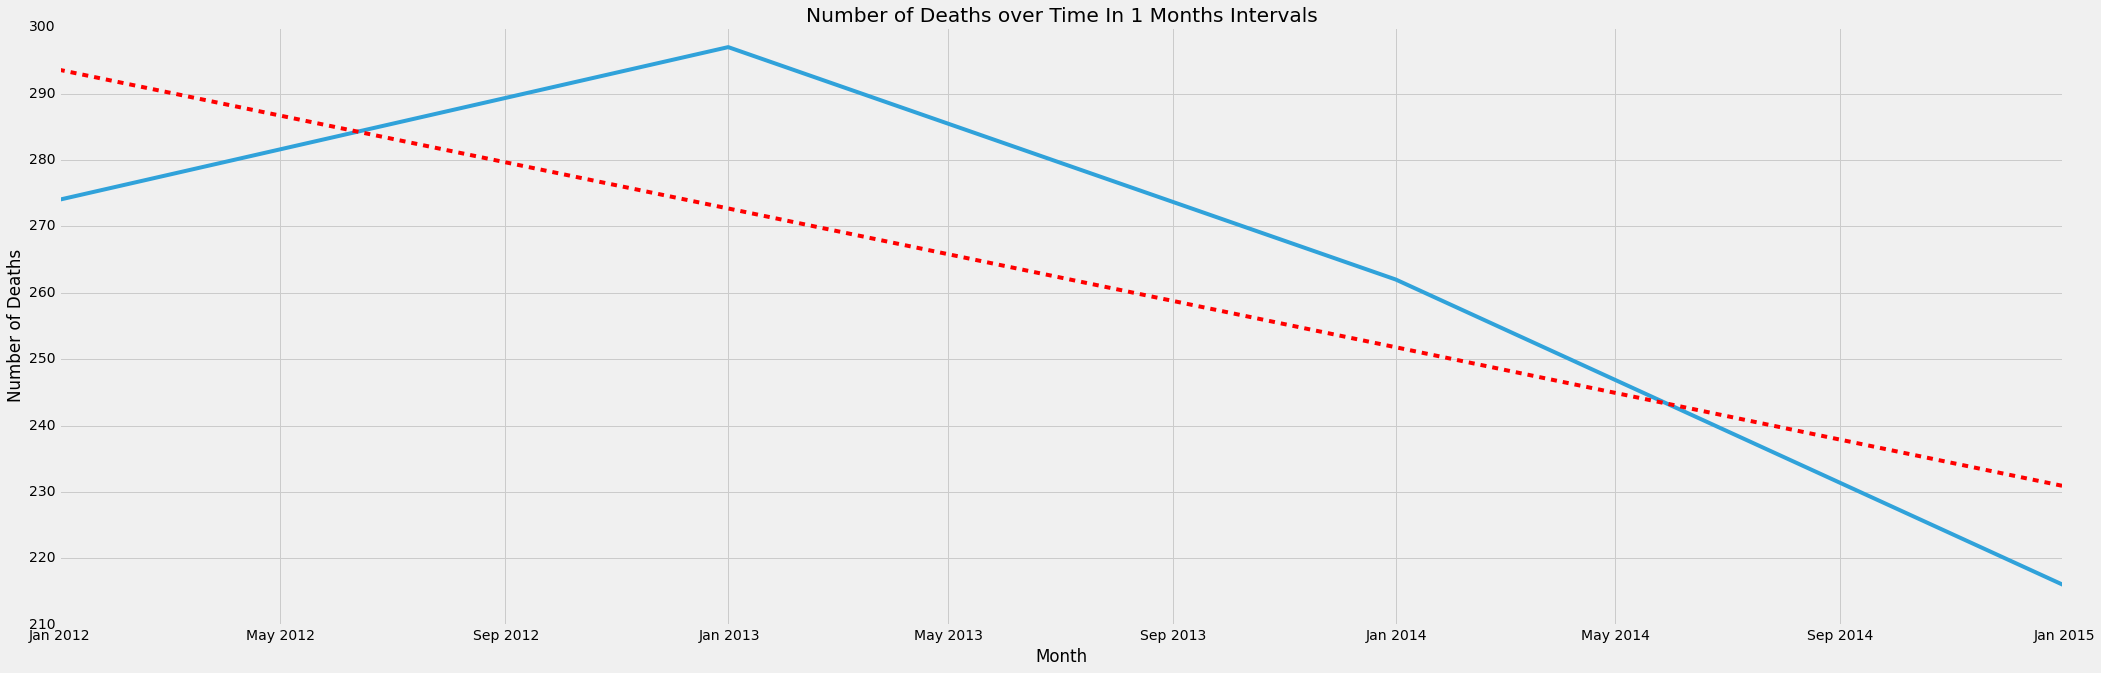

In [17]:
figure, ax = pl.subplots(figsize=(32,10))
ax.plot_date(np.unique(crashes['DATE']), agg, '-')
ax.set_title('Number of Deaths over Time In 1 Months Intervals')
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Month')
mod = smf.ols(formula='c ~ d', data = {'d': range(len(agg)), 'c': agg}).fit()
print mod.summary()
#abline_plot(model_results=mod, ax=ax, color='red')
y = mod.params[0] + mod.params[1]*np.arange(len(agg))
ax.plot_date(np.unique(crashes['DATE']), y, 'r--')
#ticks = np.repeat(datetime.datetime(year=2012, month=7, day=1), 42) + datetime.timedelta(months=1)*np.arange(42)
#ax.set_xticks(ticks)
#ax.set_xticklabels([d.strftime('%Y') if d.month == 1 else d.strftime('%b') for d in ticks])

In [174]:
grouped = crashes.groupby('DATE')
        
sum_categories = [
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'NUMBER OF MOTORIST INJURED'
]
        
percent_categories = [
    'PERCENT OF PERSONS KILLED',
    'PERCENT OF PEDESTRIANS KILLED',
    'PERCENT OF CYCLIST KILLED',
    'PERCENT OF MOTORIST KILLED',
]

# Get numbers for each date
sums = dict([(i,[]) for i in sum_categories])
percents = dict([(i,[]) for i in percent_categories])

date = []
count = []
for d in sorted(grouped.groups.keys())[:-1]:
    print d
    group = grouped.get_group(d)
    
    date.append(group.iloc[0]['DATE'])
    
    
    count.append(group.count()['NUMBER OF PERSONS KILLED'])
    
    group_sum = group.sum()
    for i in sum_categories:
        sums[i].append(group_sum[i])
        
    group_mean = group.mean()
    for i in percent_categories:
        percents[i].append(group_mean[i])

2012-06-30T20:00:00.000000000-0400
2012-07-31T20:00:00.000000000-0400
2012-08-31T20:00:00.000000000-0400
2012-09-30T20:00:00.000000000-0400
2012-10-31T20:00:00.000000000-0400
2012-11-30T19:00:00.000000000-0500
2012-12-31T19:00:00.000000000-0500
2013-01-31T19:00:00.000000000-0500
2013-02-28T19:00:00.000000000-0500
2013-03-31T20:00:00.000000000-0400
2013-04-30T20:00:00.000000000-0400
2013-05-31T20:00:00.000000000-0400
2013-06-30T20:00:00.000000000-0400
2013-07-31T20:00:00.000000000-0400
2013-08-31T20:00:00.000000000-0400
2013-09-30T20:00:00.000000000-0400
2013-10-31T20:00:00.000000000-0400
2013-11-30T19:00:00.000000000-0500
2013-12-31T19:00:00.000000000-0500
2014-01-31T19:00:00.000000000-0500
2014-02-28T19:00:00.000000000-0500
2014-03-31T20:00:00.000000000-0400
2014-04-30T20:00:00.000000000-0400
2014-05-31T20:00:00.000000000-0400
2014-06-30T20:00:00.000000000-0400
2014-07-31T20:00:00.000000000-0400
2014-08-31T20:00:00.000000000-0400
2014-09-30T20:00:00.000000000-0400
2014-10-31T20:00:00.

In [28]:
mod = smf.ols(formula='k ~ C(m)', data = {
    'k': killed, 
    'm': month
}).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      k   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.7298
Date:                Mon, 30 Nov 2015   Prob (F-statistic):              0.702
Time:                        16:46:46   Log-Likelihood:                -123.62
No. Observations:                  41   AIC:                             271.2
Df Residuals:                      29   BIC:                             291.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       22.6667      3.387      6.692   

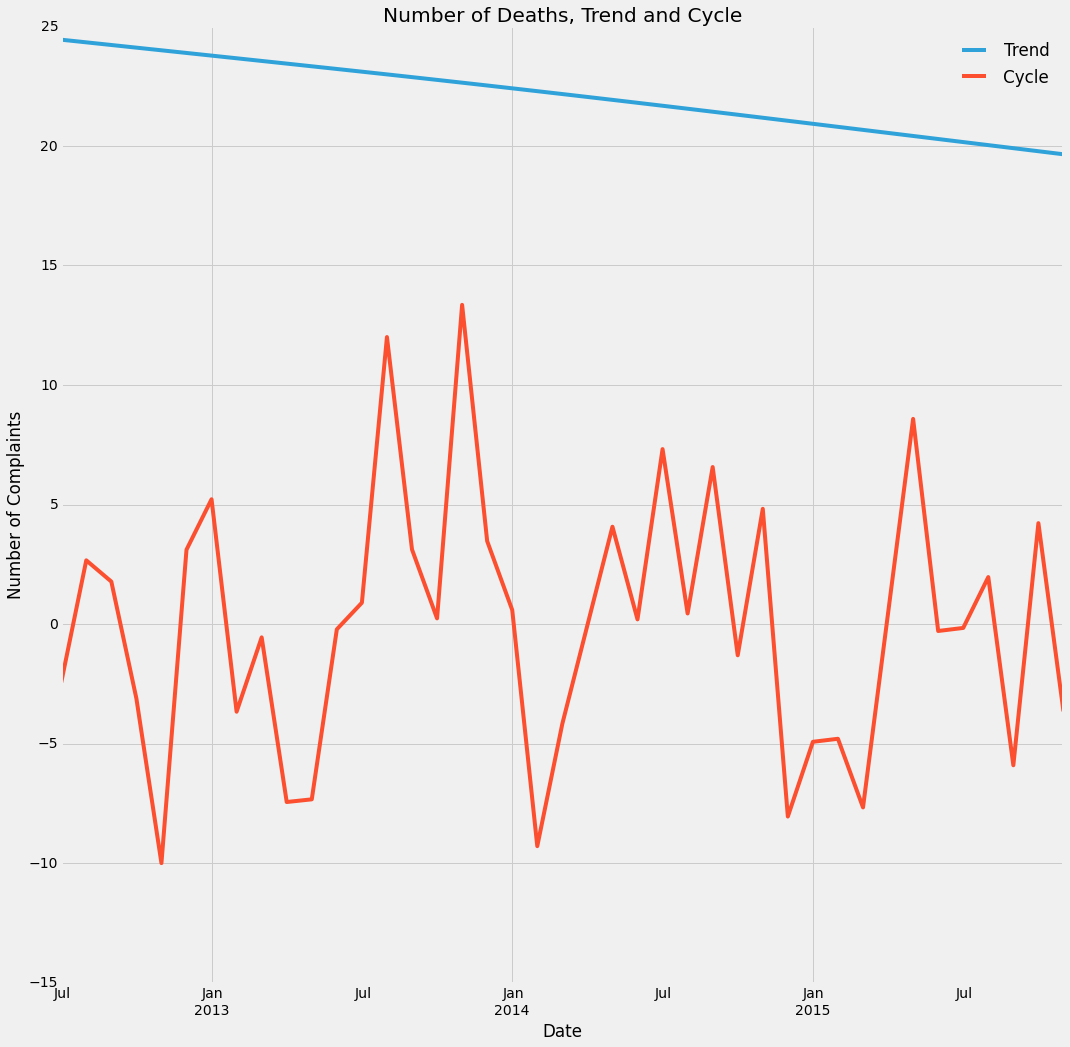

In [32]:
grouped = crashes.groupby('DATE')
cycle, trend = sma.tsa.filters.hpfilter(grouped.sum()['NUMBER OF PERSONS KILLED'], lamb = 129600)
figure, ax = pl.subplots(figsize=(16,16))
trend.plot(label='Trend')
cycle.plot(label='Cycle')
ax.set_title('Number of Deaths, Trend and Cycle')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Complaints')
ax.legend()

In [56]:
# Start of vision zero
jan_index = 17
# Speed limit decrease
nov_index = 28

#scipy.stats.chisquare(np.diff(trend)[:jan_index], np.diff(trend)[jan_index+6:])
scipy.stats.chisquare(100*np.abs(np.diff(trend))[:jan_index], 100*np.abs(np.diff(trend))[jan_index+6:])

(2.6642203768936912, 0.99992403539267527)

In [102]:
def doStuff(arr, name, lamb=129600):
    jan_index = 17
    # Speed limit decrease
    nov_index = 28
    
    cycle, trend = sma.tsa.filters.hpfilter(arr, lamb = lamb)

    figure, ax = pl.subplots(figsize=(12,8))

    #Before
    y = trend[:jan_index+1]/trend[0]#/np.max(trend[:jan_index+1])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend Before Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--', label='Regression of Trend Before Vision Zero')
    #print "Coef:", mod.params[1]

    #Jan
    y = trend[jan_index+1:]/trend[jan_index+1]#/np.max(trend[jan_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Vision Zero')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Vision Zero')
    #print "Coef:", mod.params[1]


    y = trend[nov_index+1:]/trend[nov_index+1]#/np.max(trend[nov_index+1:])
    x = np.arange(len(y))
    ax.plot(x,y,label='Trend After Speed Limit Change')

    mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
    print mod.conf_int()
    y = mod.params[0] + x*mod.params[1]
    ax.plot(x,y,'--',label='Regression of Trend After Speed Limit Change')
    #print "Coef:", mod.params[1]

    ax.set_title(name)
    ax.legend()

                  0         1
Intercept  1.000035  1.000375
x         -0.004116 -0.004082
                  0         1
Intercept  1.000365  1.000744
x         -0.004931 -0.004900
                  0         1
Intercept  0.999984  0.999997
x         -0.005234 -0.005232
                  0         1
Intercept  0.999929  0.999973
x         -0.001476 -0.001471
                  0         1
Intercept  0.999170  0.999698
x         -0.001346 -0.001303
                  0         1
Intercept  0.999819  0.999968
x         -0.001266 -0.001241
                  0         1
Intercept  1.000218  1.001011
x         -0.006532 -0.006452
                  0         1
Intercept  1.000452  1.000974
x         -0.008139 -0.008096
                  0         1
Intercept  1.000000  1.000020
x         -0.008979 -0.008975
                  0         1
Intercept  1.000124  1.000531
x         -0.005083 -0.005042
                  0         1
Intercept  1.000249  1.000533
x         -0.005961 -0.005938
          

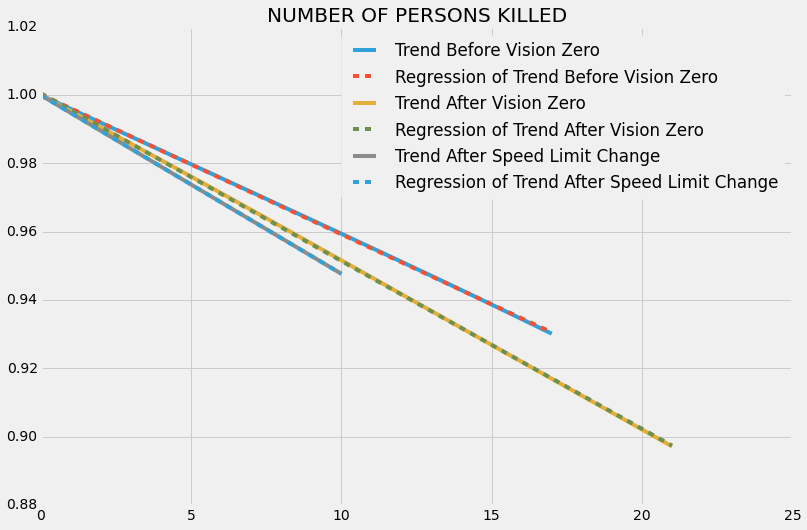

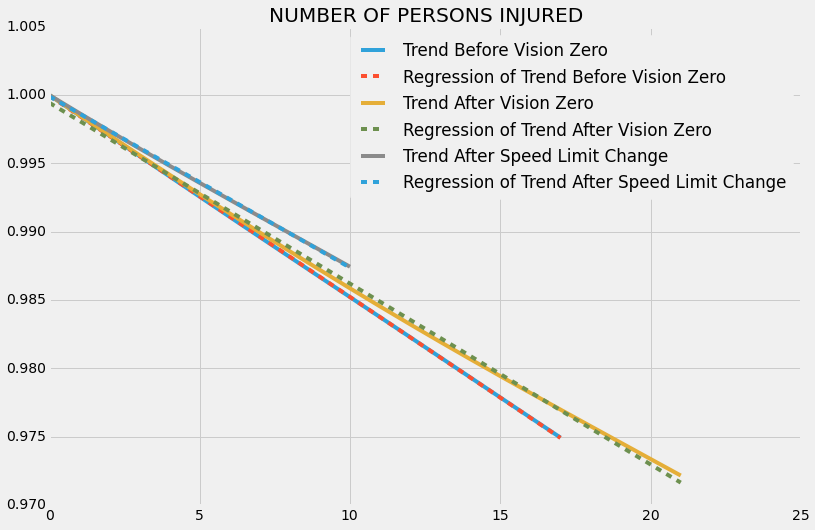

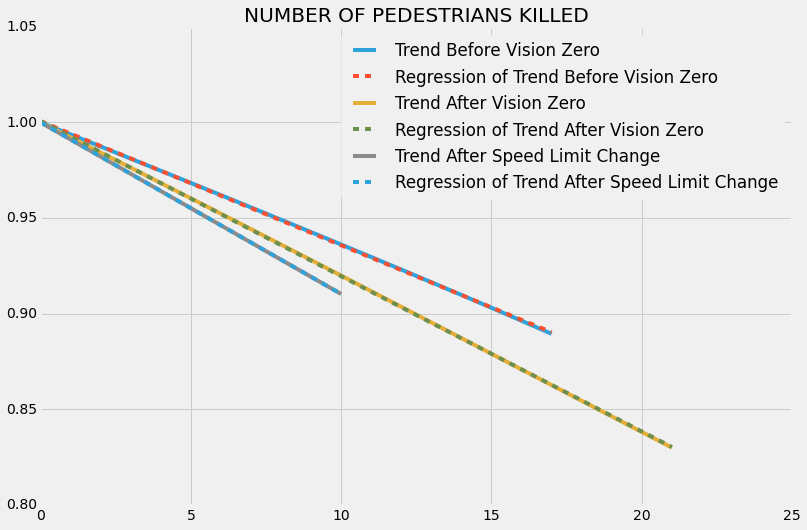

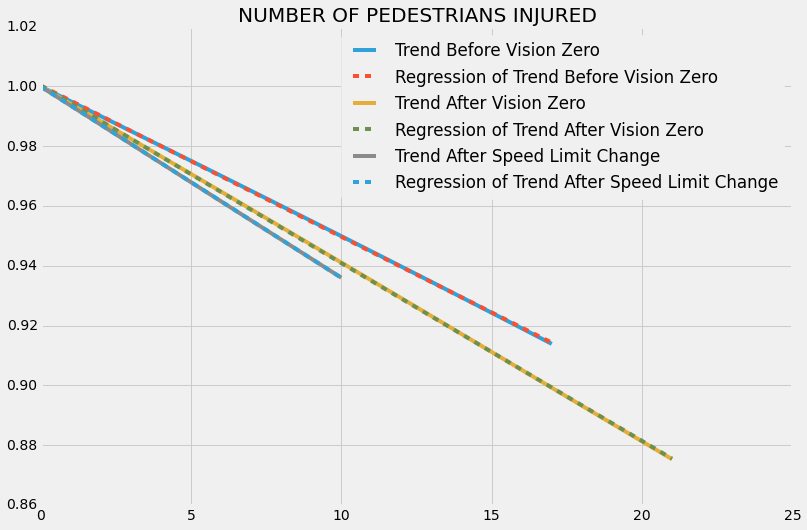

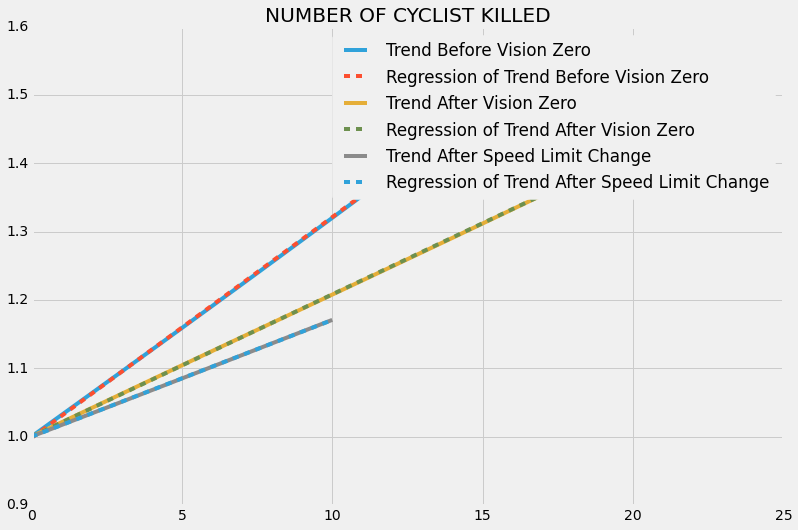

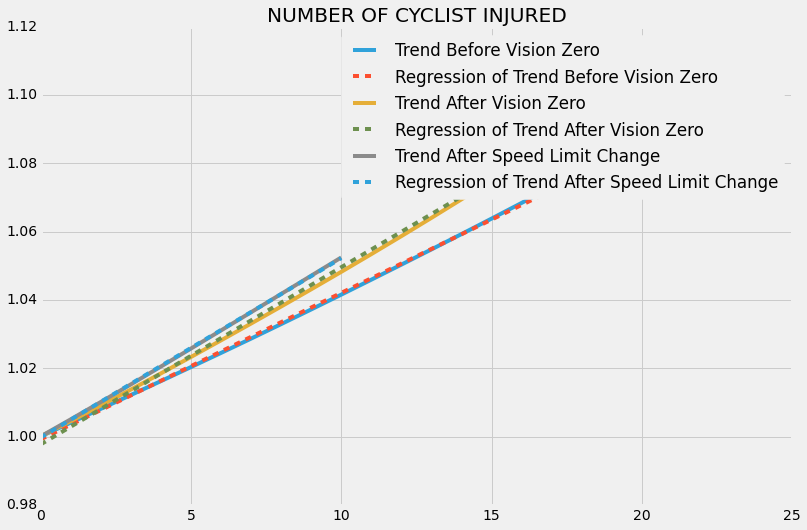

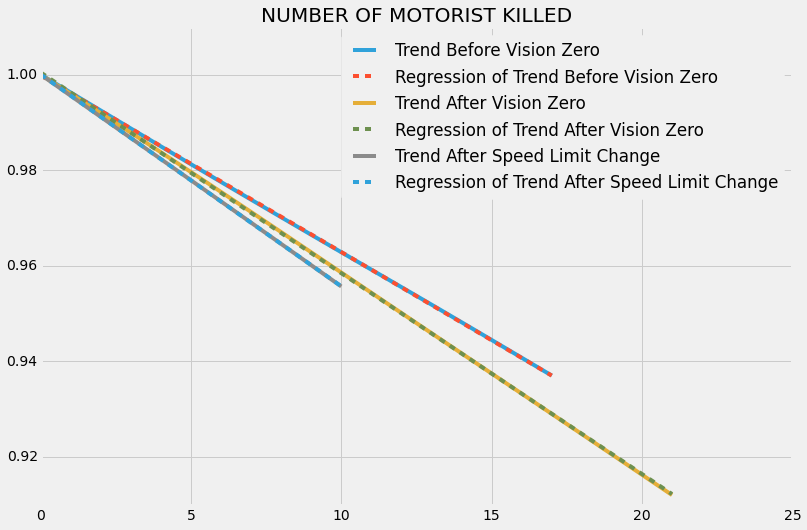

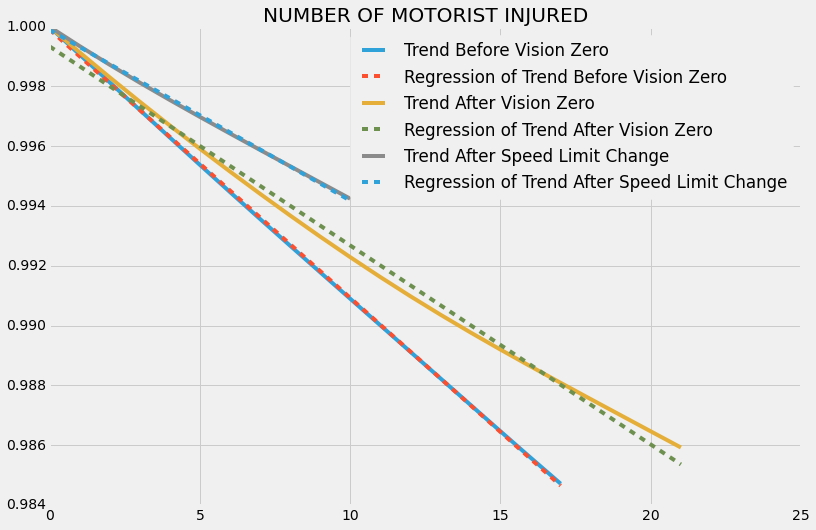

In [176]:
for i in sum_categories:
    doStuff(sums[i], i)

                  0         1
Intercept  1.000103  1.000588
x         -0.002939 -0.002890
                  0         1
Intercept  1.000782  1.001804
x         -0.003893 -0.003810
                  0         1
Intercept  1.000032  1.000173
x         -0.004180 -0.004156
                  0         1
Intercept  1.000110  1.000595
x         -0.001596 -0.001547
                  0         1
Intercept  1.000468  1.001108
x         -0.002210 -0.002158
                  0         1
Intercept  1.000019  1.000127
x         -0.002341 -0.002323
                  0         1
Intercept  0.999620  1.000352
x          0.021926  0.021999
                  0         1
Intercept  1.002562  1.005613
x          0.013483  0.013732
                  0         1
Intercept  1.000052  1.000232
x          0.011411  0.011442
                  0         1
Intercept  1.000004  1.000333
x         -0.004028 -0.003995
                  0         1
Intercept  1.000664  1.001405
x         -0.004999 -0.004939
          

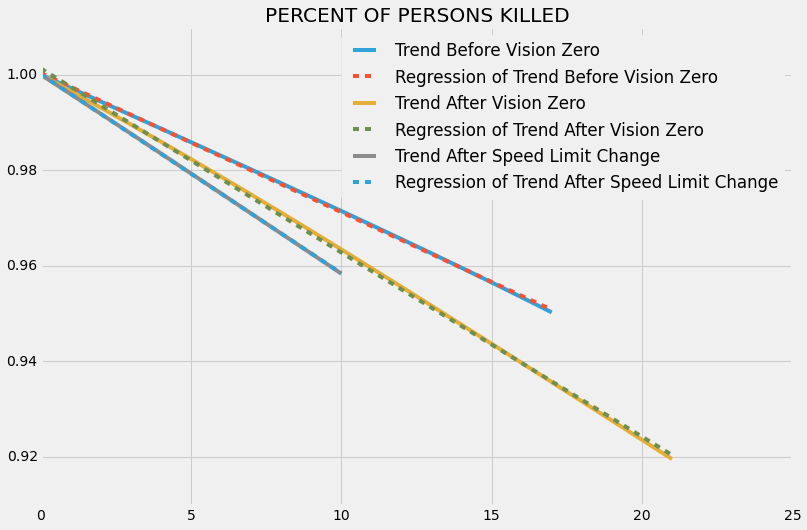

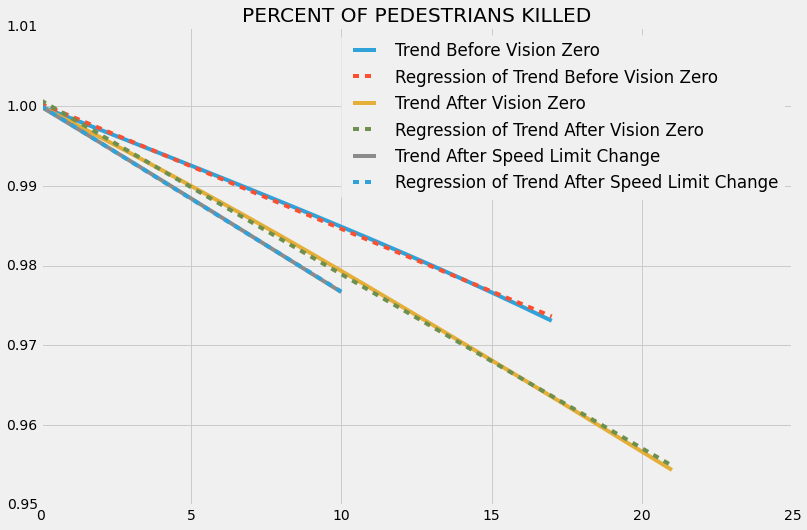

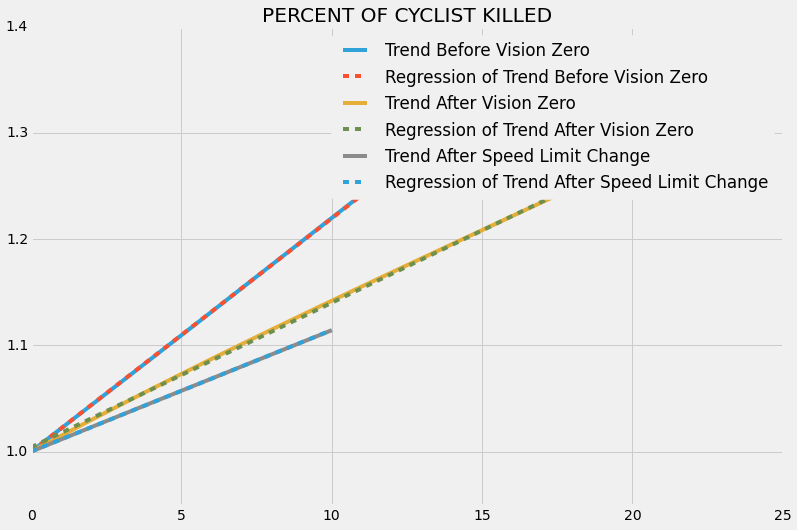

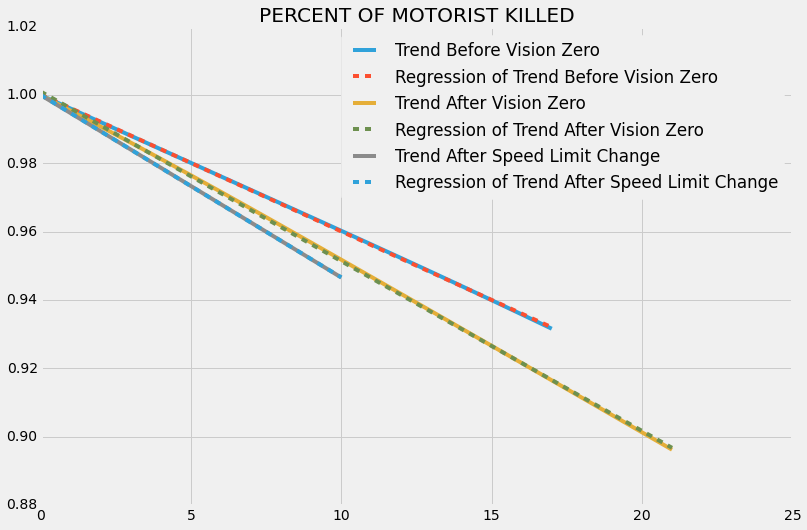

In [177]:
for i in percent_categories:
    doStuff(percents[i], i)

                  0         1
Intercept  0.999878  0.999969
x          0.003007  0.003016
                  0         1
Intercept  0.999425  0.999778
x          0.003012  0.003041
                  0         1
Intercept  0.999904  0.999983
x          0.002980  0.002993


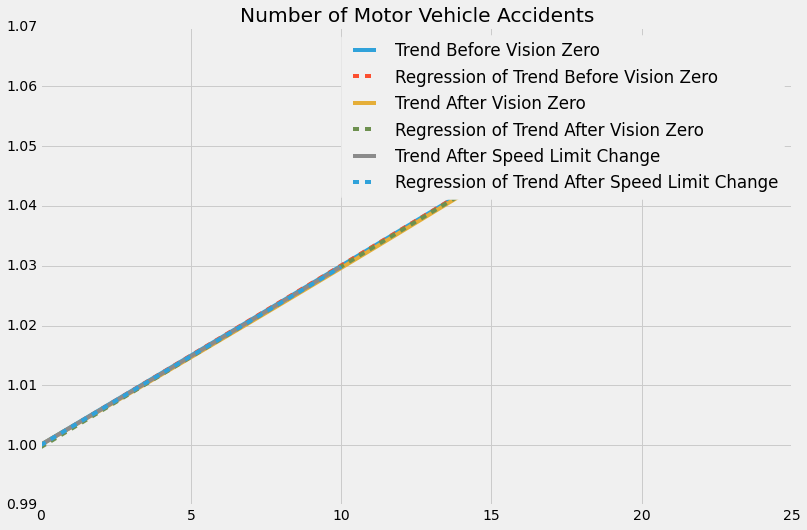

In [178]:
doStuff(count, 'Number of Motor Vehicle Accidents')

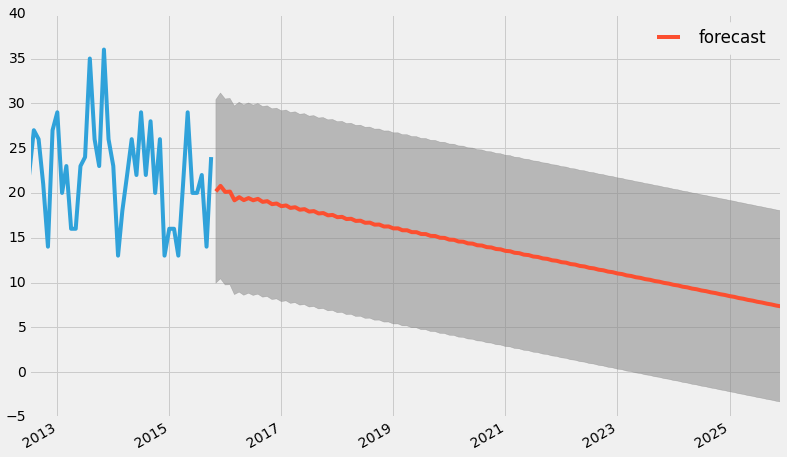

In [194]:
#dates = sorted(grouped.groups.keys())[:-1]
y = sums['NUMBER OF PERSONS KILLED']
mod = statsmodels.tsa.arima_model.ARIMA(np.array(y).astype(float), (6,1,2), dates = date).fit()

figure, ax = pl.subplots(figsize=(12,8))

ax.plot(date, y)
#mod.plot_predict('2015-09-30T20:00:00.000000000-0400', '2025', dynamic=True, ax=ax, plot_insample=False)
mod.plot_predict('2015-11-01', '2025', dynamic=True, ax=ax, plot_insample=False)

ax.set_title('')

In [175]:
sums

{'NUMBER OF CYCLIST INJURED': [450.0,
  507.0,
  433.0,
  332.0,
  276.0,
  212.0,
  192.0,
  131.0,
  195.0,
  290.0,
  400.0,
  508.0,
  470.0,
  524.0,
  479.0,
  429.0,
  281.0,
  175.0,
  120.0,
  94.0,
  190.0,
  309.0,
  388.0,
  473.0,
  538.0,
  501.0,
  488.0,
  430.0,
  280.0,
  186.0,
  115.0,
  82.0,
  161.0,
  304.0,
  474.0,
  441.0,
  574.0,
  568.0,
  517.0,
  408.0],
 'NUMBER OF CYCLIST KILLED': [3.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  3.0,
  0.0,
  1.0,
  0.0,
  2.0,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.0,
  2.0,
  3.0,
  3.0,
  4.0,
  1.0,
  1.0,
  2.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  1.0,
  1.0,
  3.0,
  3.0,
  2.0,
  2.0],
 'NUMBER OF MOTORIST INJURED': [3550.0,
  3393.0,
  3362.0,
  3261.0,
  2681.0,
  3081.0,
  2738.0,
  2446.0,
  3004.0,
  3246.0,
  3643.0,
  3630.0,
  3758.0,
  3468.0,
  3514.0,
  3347.0,
  3317.0,
  2943.0,
  2720.0,
  2191.0,
  2704.0,
  2875.0,
  3376.0,
  3562.0,
  3287.0,
  3247.0,
  3219.0,
  3